In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [ ]:
df = pd.read_csv('healthy_lifestyle_city_2021.csv')

In [ ]:
df.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53


## Data Cleaning

In [ ]:
df['Cost of a bottle of water(City)'] = df['Cost of a bottle of water(City)'].replace(to_replace ='£', value = '', regex = True)

In [ ]:
df['Obesity levels(Country)'] = df['Obesity levels(Country)'].replace(to_replace ='%', value = '', regex = True)

In [ ]:
df['Cost of a monthly gym membership(City)'] = df['Cost of a monthly gym membership(City)'].replace(to_replace ='£', value = '', regex = True)

In [ ]:
df=df.drop(['Rank'],axis=1)

In [ ]:
df = df.replace('-', np.nan)

In [ ]:
df['Sunshine hours(City)']=df['Sunshine hours(City)'].map(float)

In [ ]:
df['Cost of a bottle of water(City)']=df['Cost of a bottle of water(City)'].map(float)
df['Obesity levels(Country)']=df['Obesity levels(Country)'].map(float)
df['Pollution(Index score) (City)']=df['Pollution(Index score) (City)'].map(float)
df['Annual avg. hours worked']=df['Annual avg. hours worked'].map(float)
df['Cost of a monthly gym membership(City)']=df['Cost of a monthly gym membership(City)'].map(float)

In [ ]:
df['Annual avg. hours worked'].unique()

array([1434., 1712., 1501., 1452., 1380., 1540., 1644., 1386., 1686.,
       1670.,   nan, 1967., 1557., 1898., 1832., 1779., 1772., 1583.,
       1505., 1538., 1718., 1965., 2137.])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Sunshine hours(City)                    43 non-null     float64
 2   Cost of a bottle of water(City)         44 non-null     float64
 3   Obesity levels(Country)                 44 non-null     float64
 4   Life expectancy(years) (Country)        44 non-null     float64
 5   Pollution(Index score) (City)           43 non-null     float64
 6   Annual avg. hours worked                33 non-null     float64
 7   Happiness levels(Country)               44 non-null     float64
 8   Outdoor activities(City)                44 non-null     int64  
 9   Number of take out places(City)         44 non-null     int64  
 10  Cost of a monthly gym membership(City)  44 non-null     float64


In [ ]:
df.isnull().sum()

City                                       0
Sunshine hours(City)                       1
Cost of a bottle of water(City)            0
Obesity levels(Country)                    0
Life expectancy(years) (Country)           0
Pollution(Index score) (City)              1
Annual avg. hours worked                  11
Happiness levels(Country)                  0
Outdoor activities(City)                   0
Number of take out places(City)            0
Cost of a monthly gym membership(City)     0
dtype: int64

In [ ]:
df.describe()

,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
count,43.000000,44.000000,44.00000,44.00000,43.000000,33.000000,44.000000,44.000000,44.000000,44.000000
mean,2245.860465,1.173409,21.92500,78.17500,51.122326,1672.909091,6.435000,213.977273,1443.113636,40.420000
std,567.403719,0.718642,10.19567,5.30437,21.856190,179.626933,0.991202,127.190297,1388.803270,15.006457
min,1405.000000,0.150000,3.90000,56.30000,13.080000,1380.000000,3.570000,23.000000,250.000000,16.070000
25%,1798.500000,0.570000,19.50000,75.40000,34.355000,1540.000000,5.870000,125.250000,548.000000,31.310000
50%,2066.000000,1.195000,22.30000,80.40000,52.640000,1686.000000,6.900000,189.500000,998.000000,37.330000
75%,2629.000000,1.600000,29.00000,81.80000,66.630000,1779.000000,7.175000,288.250000,1674.250000,47.210000
max,3542.000000,3.200000,36.20000,83.20000,91.740000,2137.000000,7.800000,585.000000,6417.000000,73.110000


### These charts show the top five healthiest cities in the world as per category

In [ ]:
df.columns

Index(['City', 'Sunshine hours(City)', 'Cost of a bottle of water(City)',
       'Obesity levels(Country)', 'Life expectancy(years) (Country)',
       'Pollution(Index score) (City)', 'Annual avg. hours worked',
       'Happiness levels(Country)', 'Outdoor activities(City)',
       'Number of take out places(City)',
       'Cost of a monthly gym membership(City)'],
      dtype='object')

In [ ]:
columns=['Sunshine hours(City)', 'Cost of a bottle of water(City)',
       'Obesity levels(Country)', 'Life expectancy(years) (Country)',
       'Pollution(Index score) (City)', 'Annual avg. hours worked',
       'Happiness levels(Country)', 'Outdoor activities(City)',
       'Number of take out places(City)',
       'Cost of a monthly gym membership(City)']

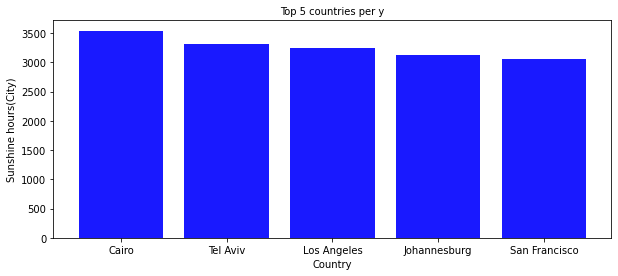

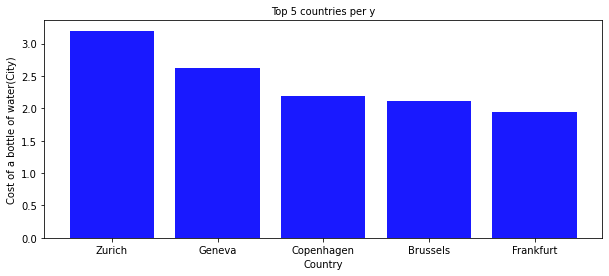

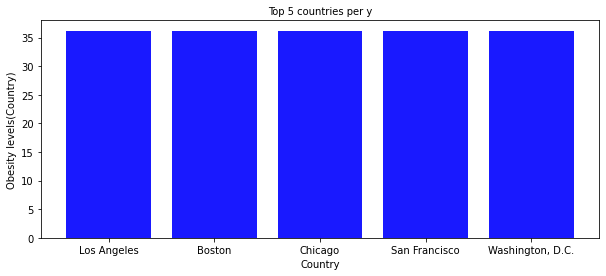

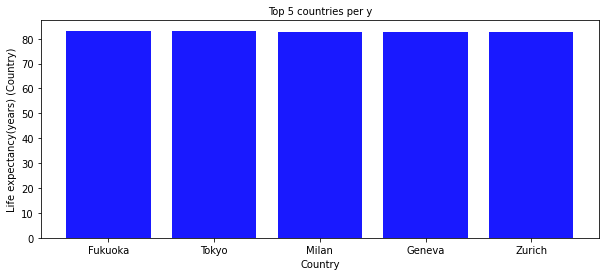

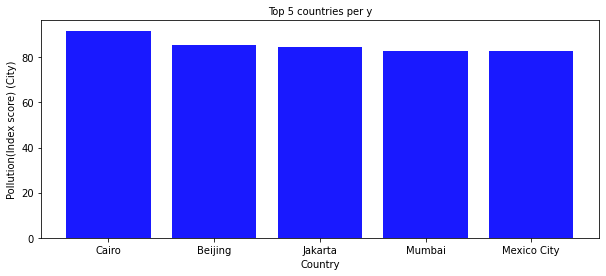

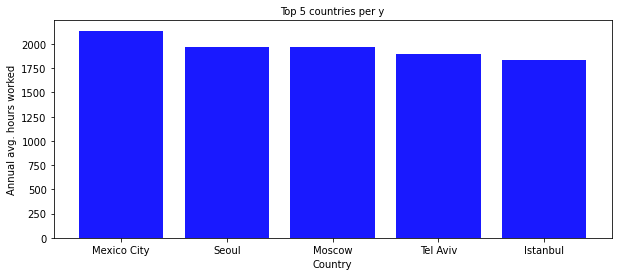

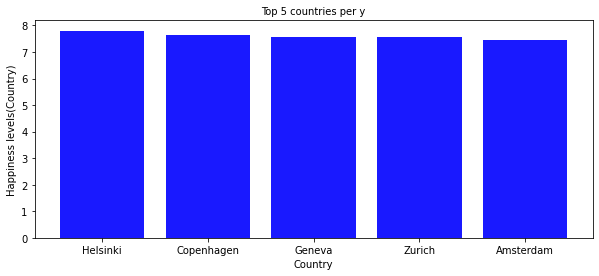

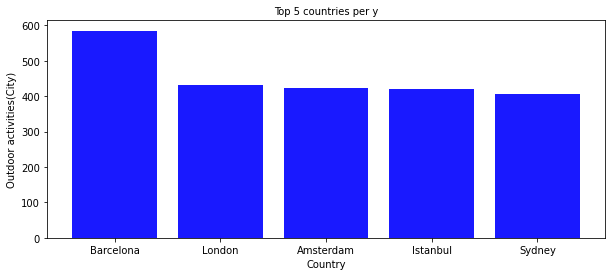

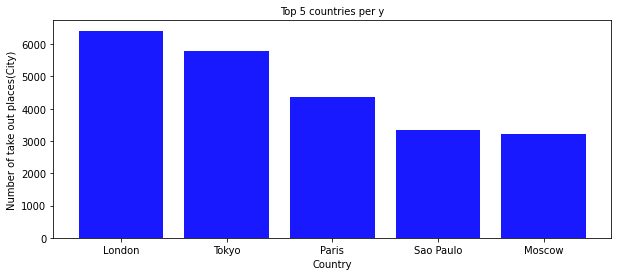

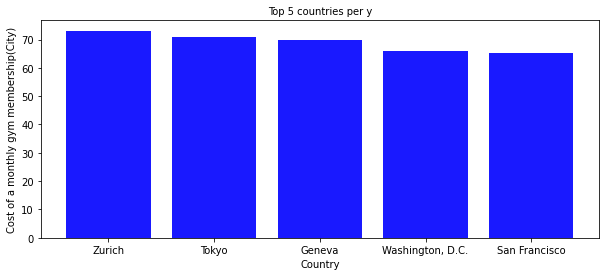

In [ ]:
for column in columns:
  top10 = df.nlargest(5,column)
  plt.figure(figsize=(10,4))
  plt.bar(top10['City'], top10[column],color='blue',alpha=0.9)
  plt.ylabel(column, fontsize = 10)
  plt.xlabel("Country", fontsize = 10)
  plt.title("Top 5 countries per y", fontsize = 10)

### These charts show the bottom five healthiest cities in the world as per category

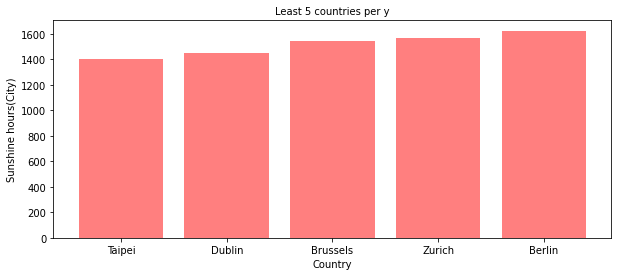

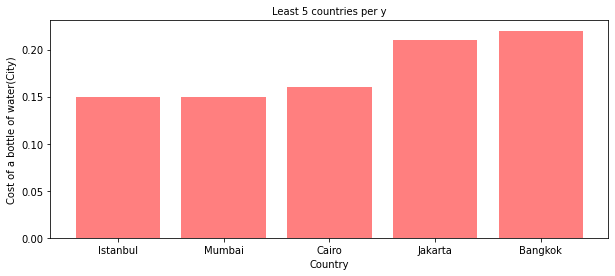

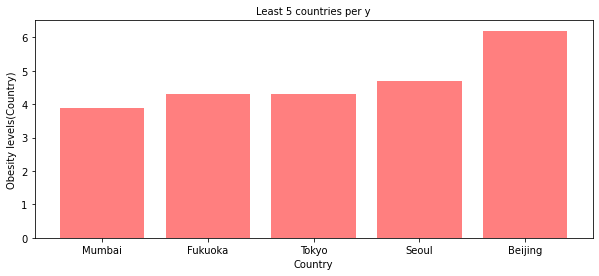

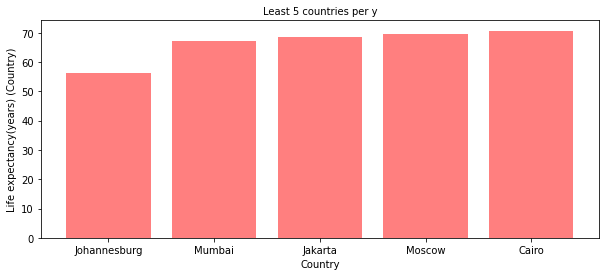

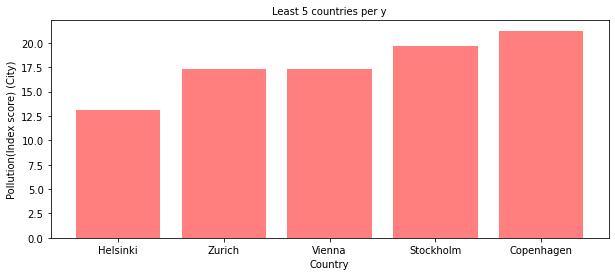

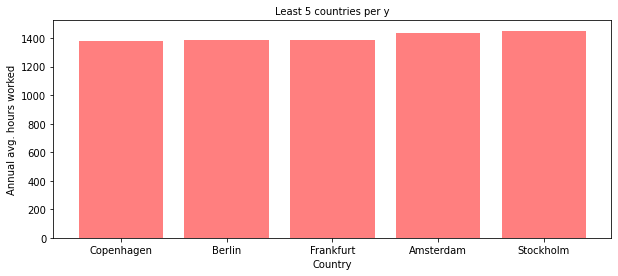

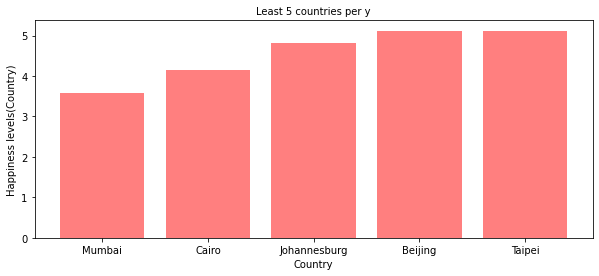

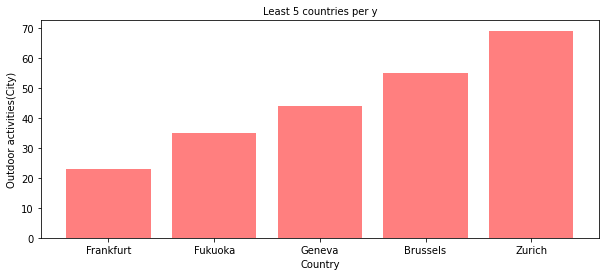

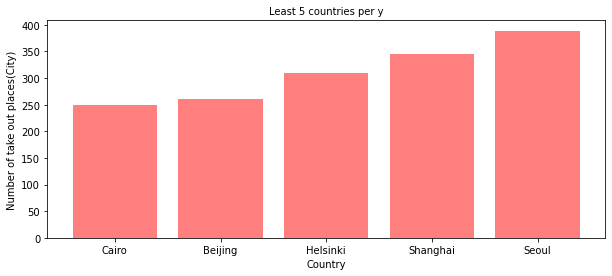

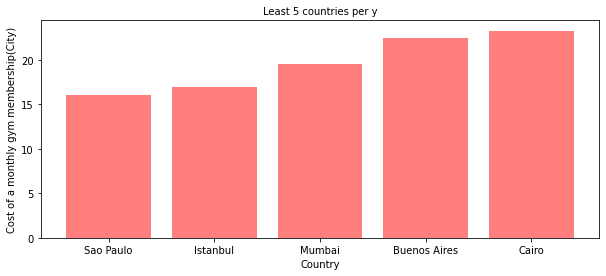

In [ ]:
for column in columns:
  top10 = df.nsmallest(5,column)
  plt.figure(figsize=(10,4))
  plt.bar(top10['City'], top10[column],color='red',alpha=0.5)
  plt.ylabel(column, fontsize = 10)
  plt.xlabel("Country", fontsize = 10)
  plt.title("Least 5 countries per y", fontsize = 10)

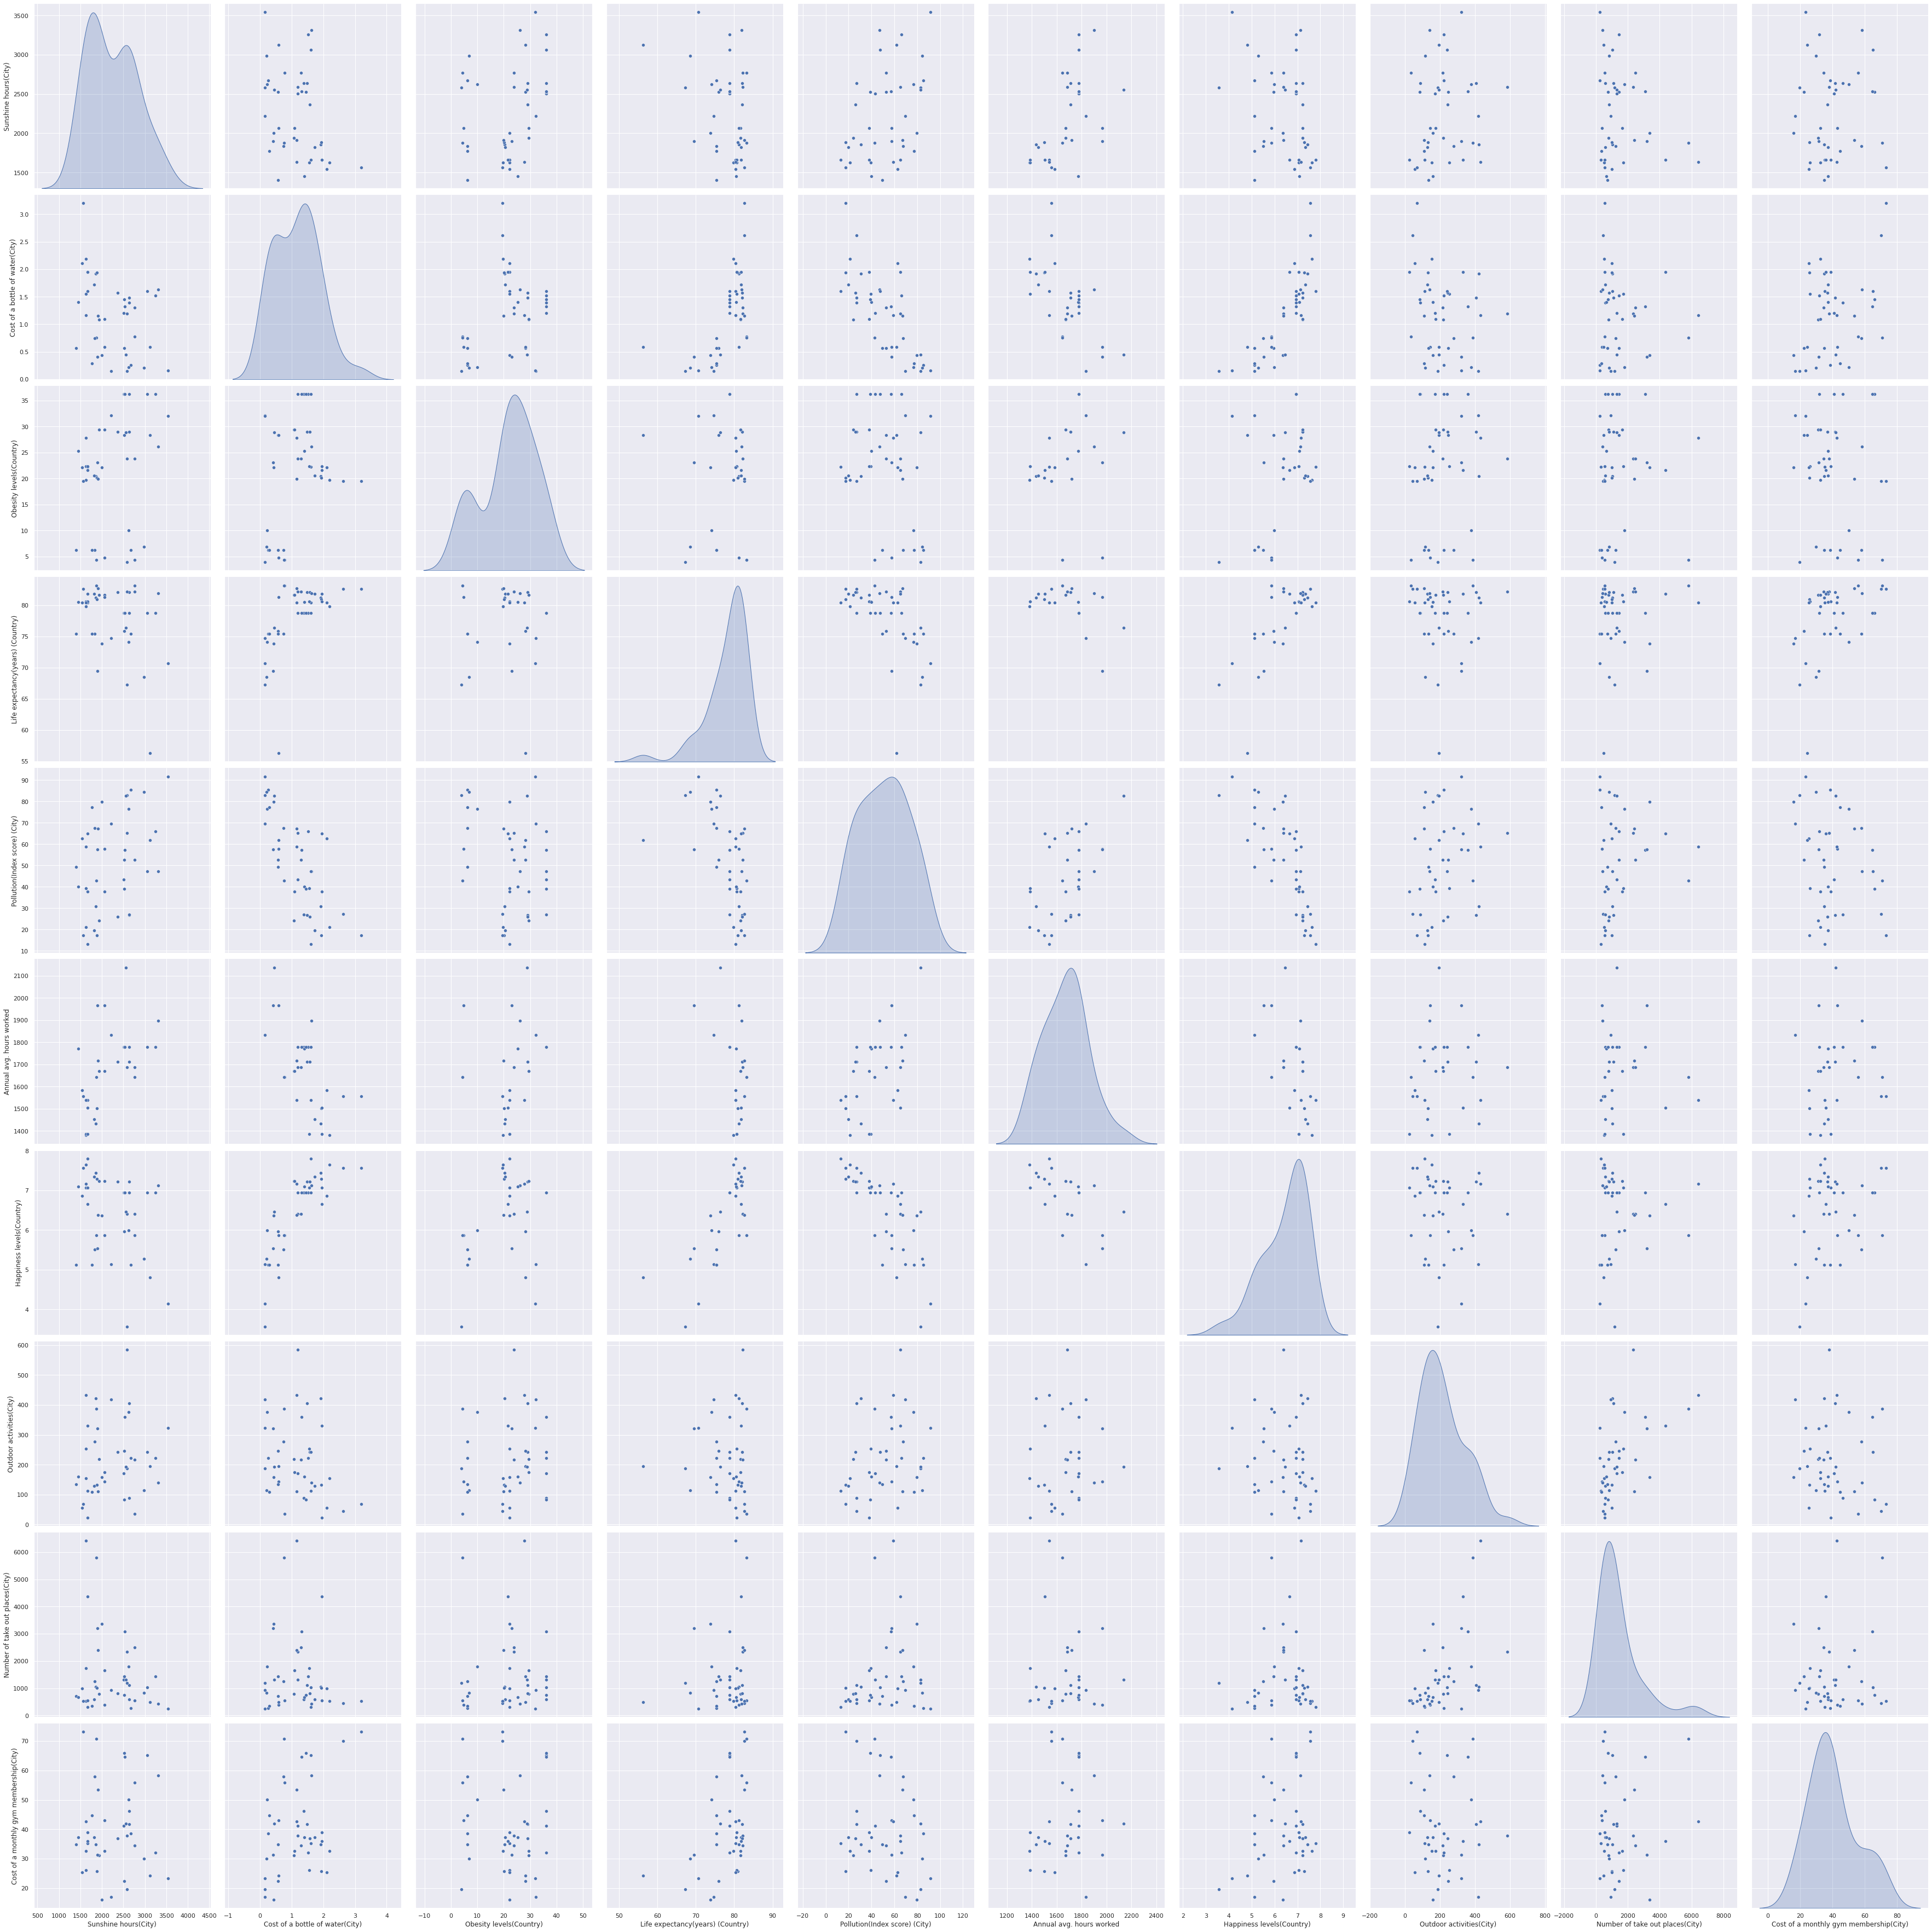

In [ ]:
sns.set()
sns.pairplot(df[columns],height = 5 ,kind ='scatter',diag_kind='kde')
plt.show()

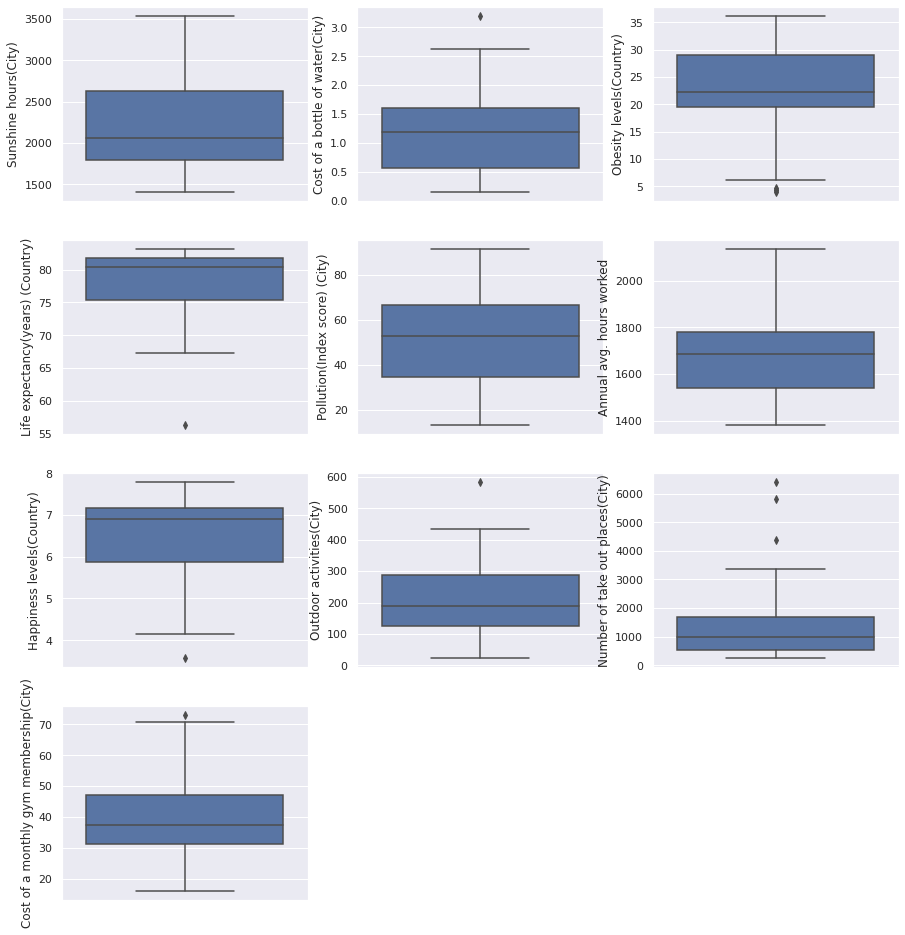

In [ ]:
i=1
plt.figure(figsize=(15,25))
for feature in columns:
    plt.subplot(6,3,i)
    sns.boxplot(y=df[feature])
    i+=1

In [ ]:
Asia=df.loc[[6,11,12,16,17,23,28,30,31]]

In [ ]:
Asia

,City,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
6,Fukuoka,2769.0,0.78,4.3,83.2,NaN,1644.0,5.87,35,539,55.87
11,Beijing,2671.0,0.26,6.2,75.4,85.43,NaN,5.12,223,261,38.62
12,Bangkok,2624.0,0.22,10.0,74.1,76.64,NaN,5.99,377,1796,50.03
16,Jakarta,2983.0,0.21,6.9,68.5,84.39,NaN,5.28,114,833,29.94
17,Seoul,2066.0,0.59,4.7,81.3,57.82,1967.0,5.87,144,389,43.03
23,Taipei,1405.0,0.57,6.2,75.4,49.32,NaN,5.12,134,717,34.76
28,Tokyo,1877.0,0.76,4.3,83.2,42.84,1644.0,5.87,387,5802,70.82
30,Hong Kong,1836.0,0.75,6.2,75.4,67.46,NaN,5.51,277,1257,57.95
31,Shanghai,1776.0,0.29,6.2,75.4,77.40,NaN,5.12,108,346,44.68


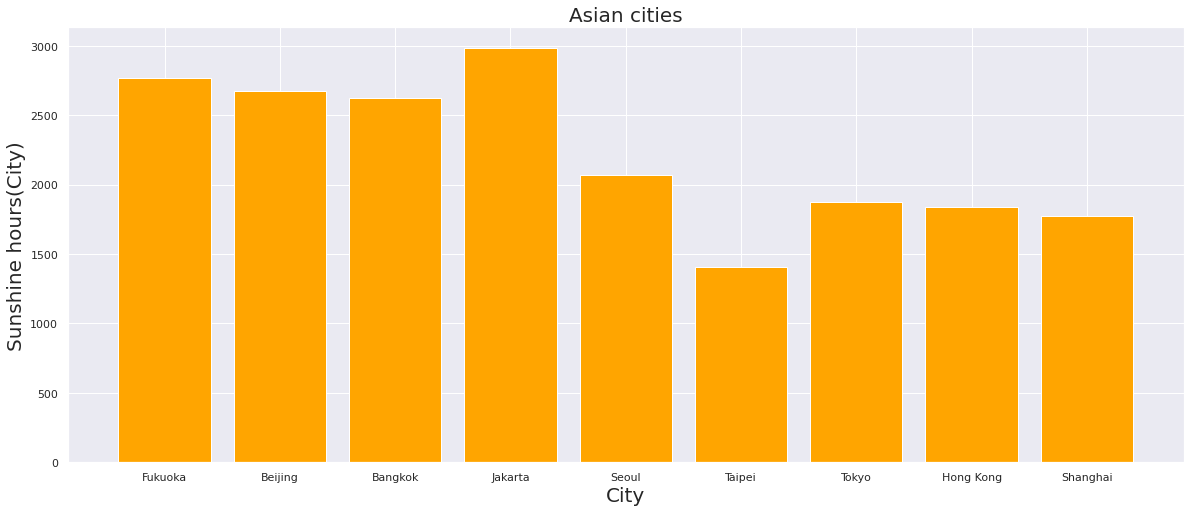

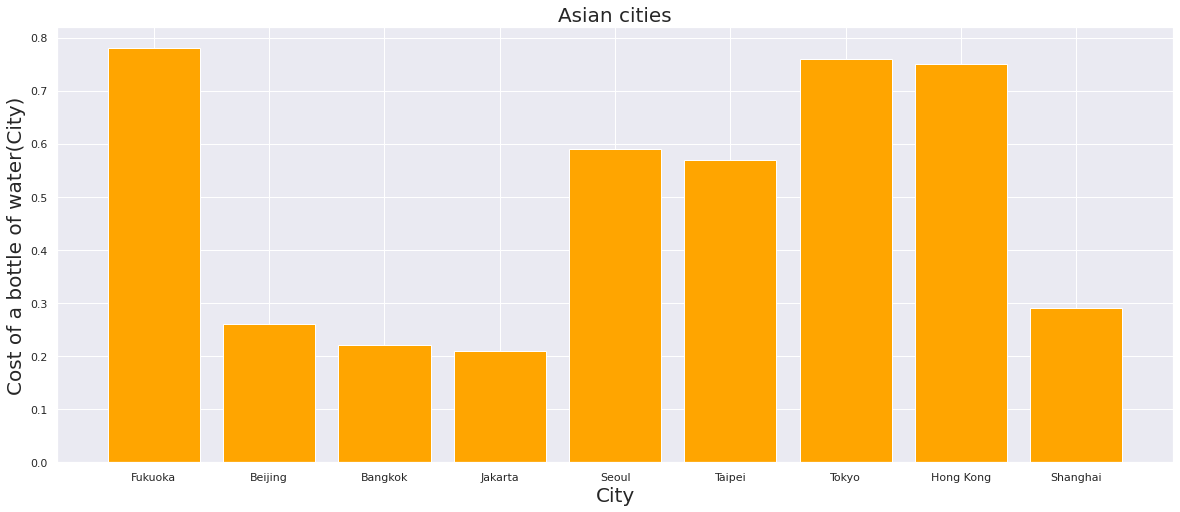

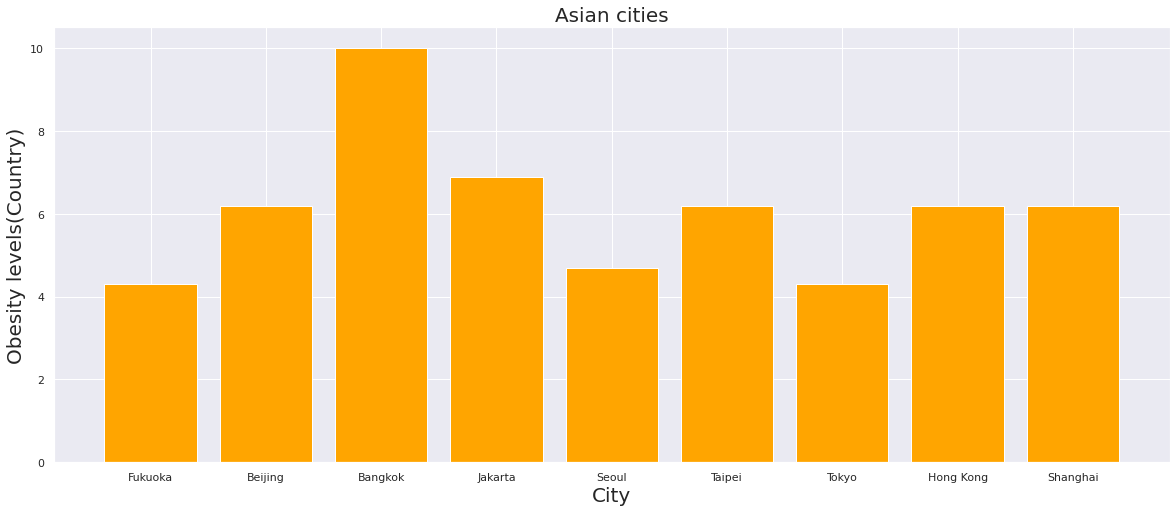

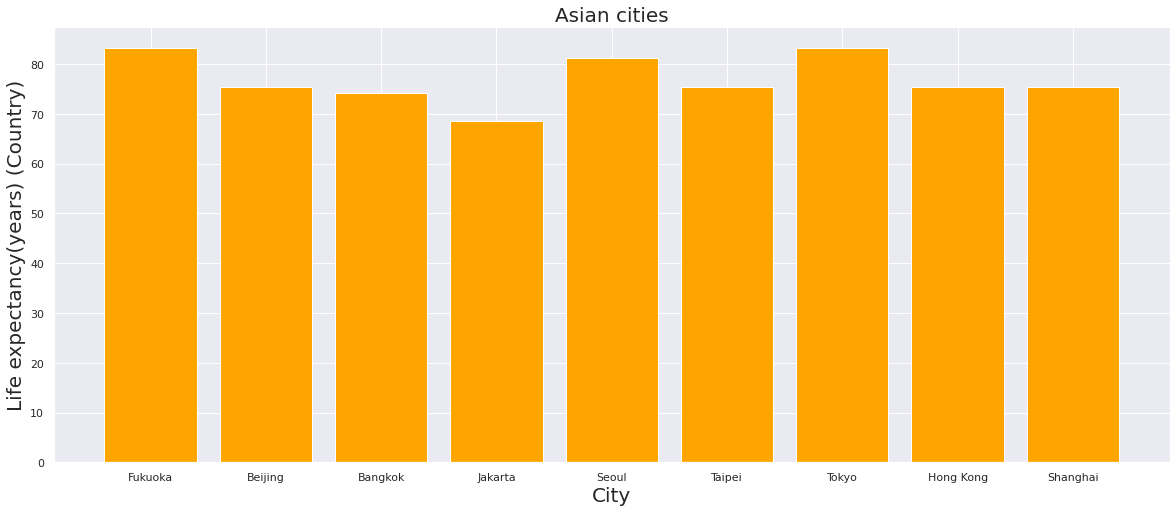

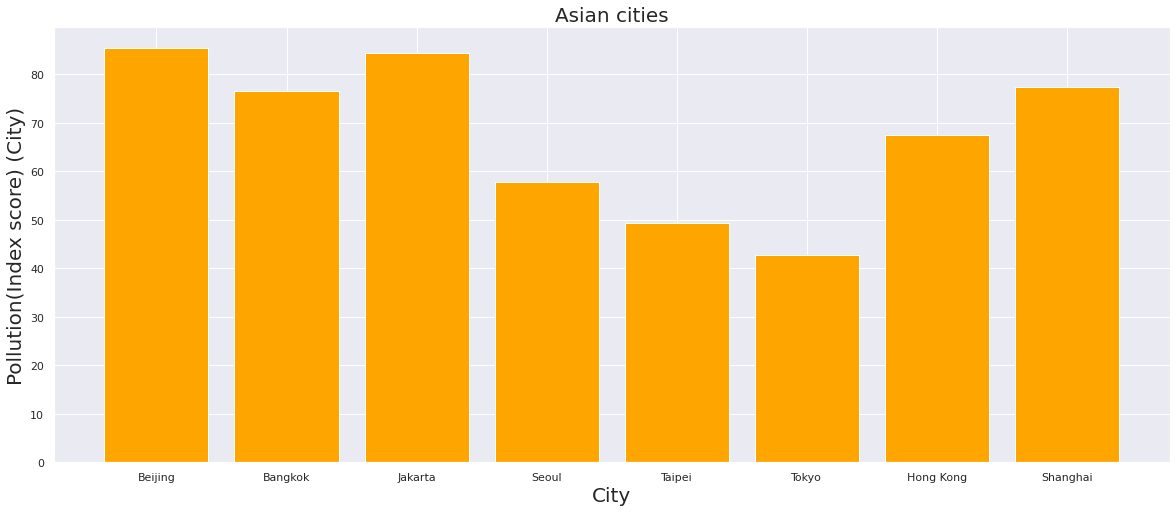

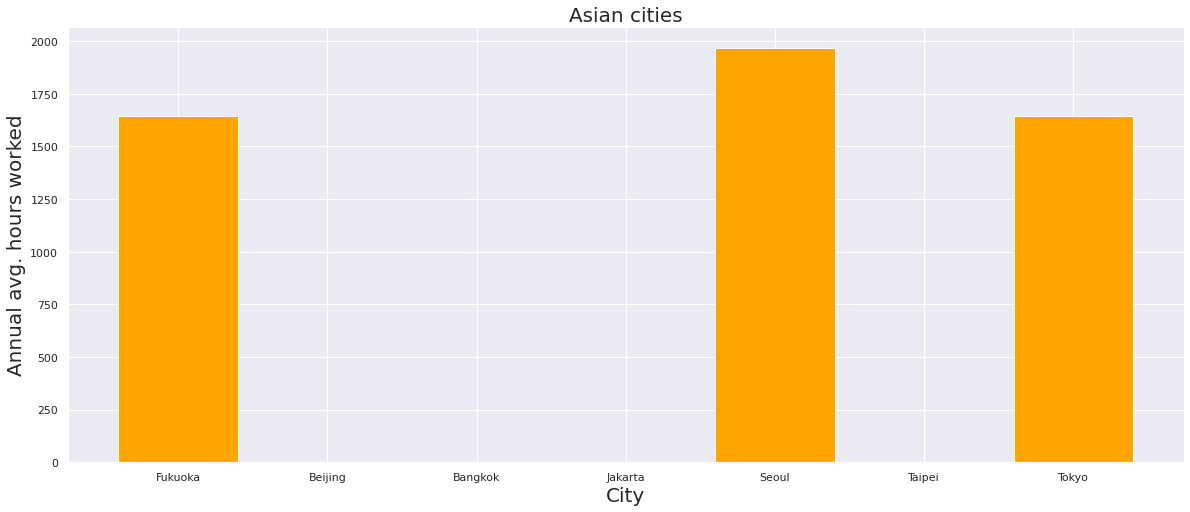

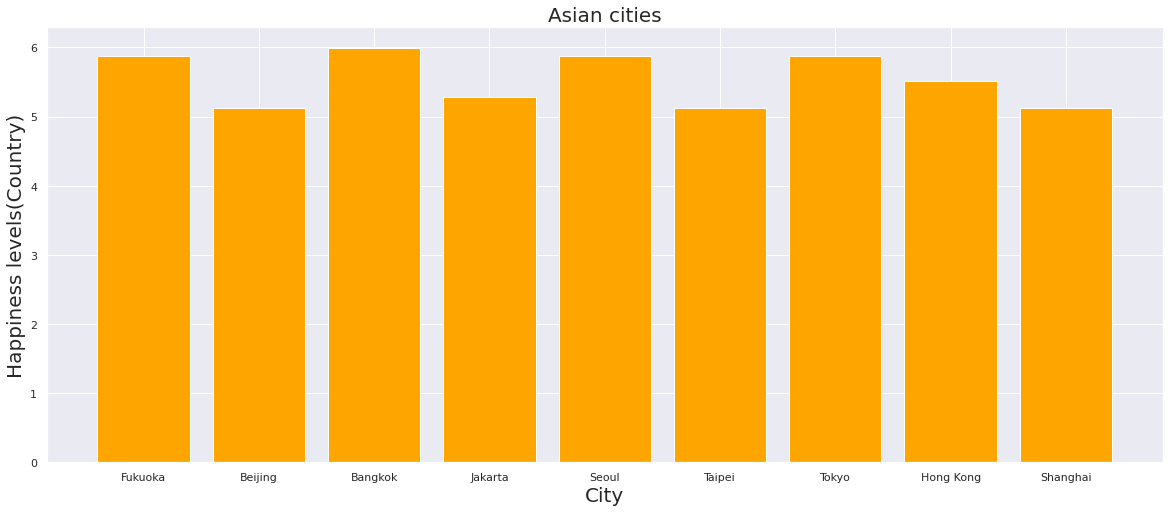

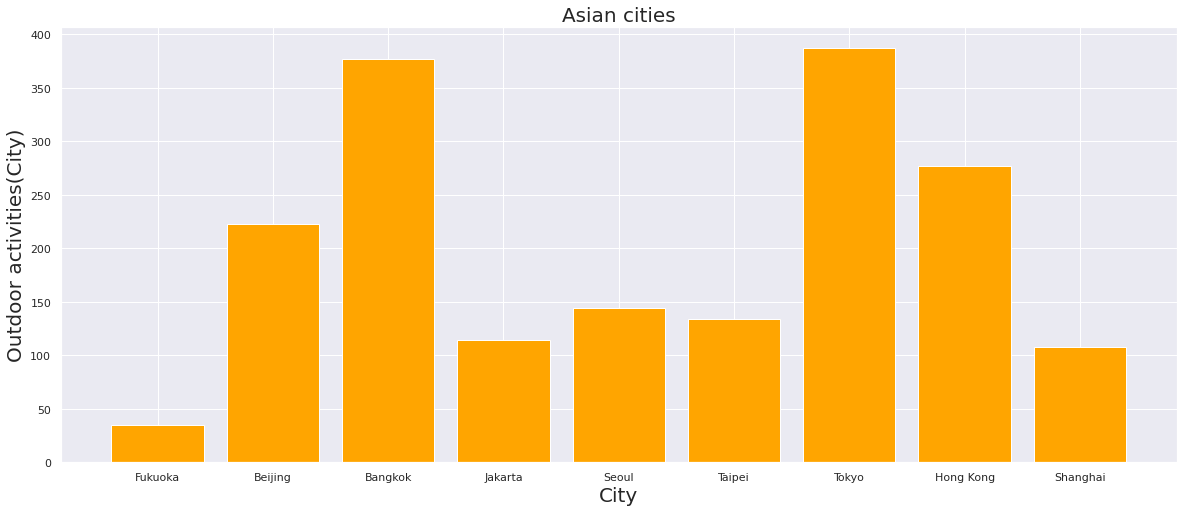

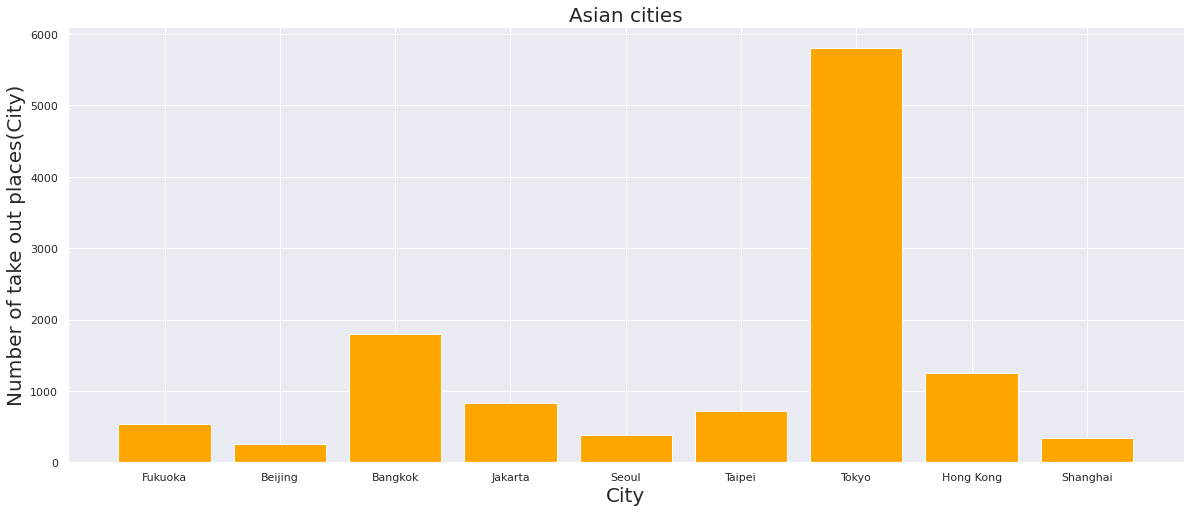

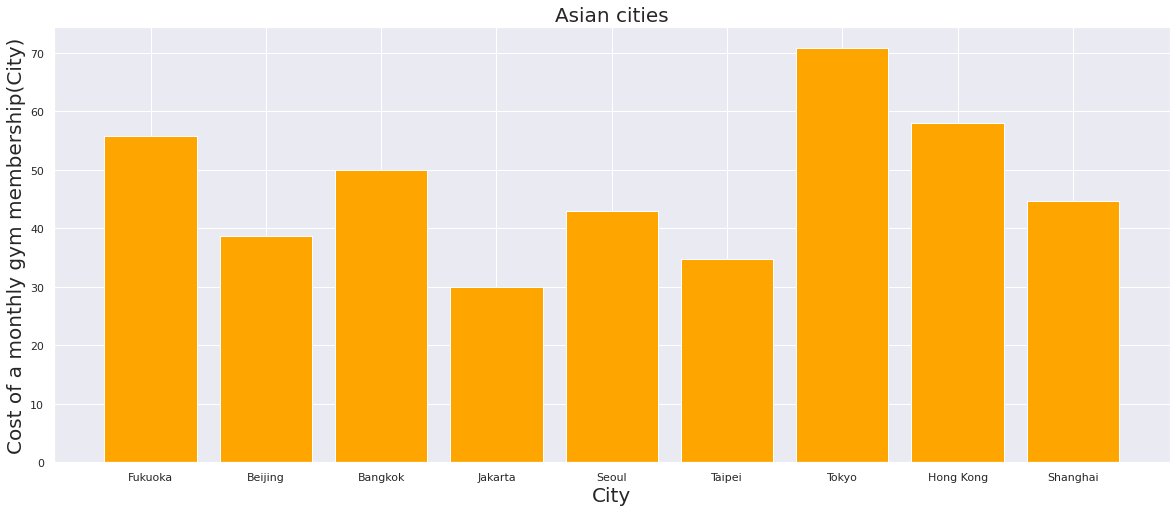

In [ ]:
for column in columns:
  plt.figure(figsize=(20,8))
  plt.bar(Asia['City'], Asia[column],color='orange')
  plt.ylabel(column, fontsize = 20)
  plt.xlabel("City", fontsize = 20)
  plt.title("Asian cities", fontsize = 20)

In [ ]:
df=df.set_index('City')

In [ ]:
df.columns

Index(['Sunshine hours(City)', 'Cost of a bottle of water(City)',
       'Obesity levels(Country)', 'Life expectancy(years) (Country)',
       'Pollution(Index score) (City)', 'Annual avg. hours worked',
       'Happiness levels(Country)', 'Outdoor activities(City)',
       'Number of take out places(City)',
       'Cost of a monthly gym membership(City)'],
      dtype='object')

In [ ]:
correlation = df.corr()
print(correlation['Happiness levels(Country)'].sort_values(ascending = False),'\n')

Happiness levels(Country)                 1.000000
Cost of a bottle of water(City)           0.813159
Life expectancy(years) (Country)          0.724587
Obesity levels(Country)                   0.446399
Cost of a monthly gym membership(City)    0.297425
Number of take out places(City)           0.033116
Outdoor activities(City)                 -0.137612
Sunshine hours(City)                     -0.334141
Annual avg. hours worked                 -0.531554
Pollution(Index score) (City)            -0.765902
Name: Happiness levels(Country), dtype: float64 



Index(['Happiness levels(Country)', 'Cost of a bottle of water(City)',
       'Life expectancy(years) (Country)', 'Obesity levels(Country)',
       'Cost of a monthly gym membership(City)',
       'Number of take out places(City)', 'Outdoor activities(City)'],
      dtype='object')


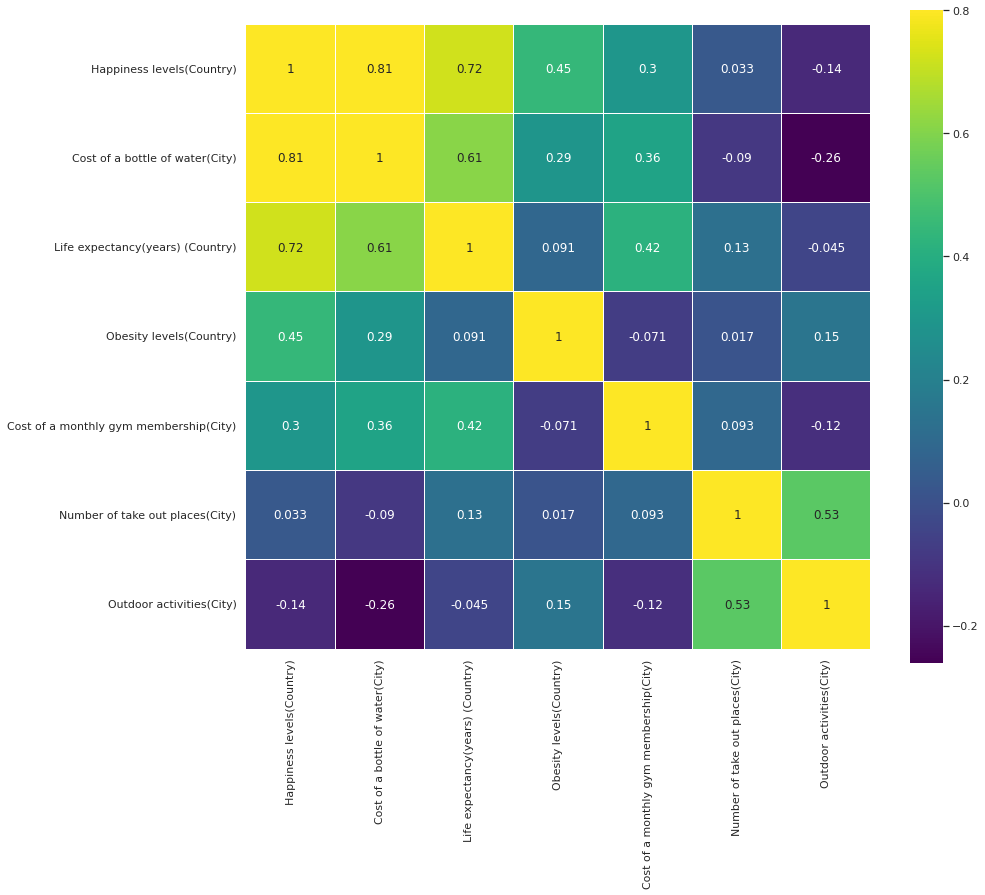

In [ ]:
k= 7
cols = correlation.nlargest(k,'Happiness levels(Country)')['Happiness levels(Country)'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)